In [23]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
import seaborn as sns
from nose.tools import assert_equal
from numpy.testing import assert_array_equal
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split
%config Completer.use_jedi = False  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('openpowerlifting.csv')
df = df[df['Sex'] == 'M']
df = df[df['Event'] == 'SBD']
df = df[df['Equipment'] == 'Wraps']
df = df[['Age', 'BodyweightKg', 'Best3SquatKg','Best3DeadliftKg','Best3BenchKg']]
df = df[df['Best3SquatKg'] > 0]
df = df[df['Best3BenchKg'] > 0]
df = df[df['Best3DeadliftKg'] > 0]
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['BodyweightKg'])
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Best3SquatKg'])
df = df.dropna(subset=['Best3DeadliftKg'])
df = df.dropna(subset=['Best3BenchKg'])
df.columns=['Age', 'Bodyweight', 'Squat', 'Deadlift', 'Bench']
df[['Age', 'Bodyweight', 'Deadlift', 'Bench']]

/tmp/ipykernel_531/2277912628.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting.csv')


,Age,Bodyweight,Deadlift,Bench
42,28.0,82.0,250.0,135.0
43,27.0,89.2,250.0,140.0
44,36.0,79.5,142.5,77.5
45,34.0,114.7,270.0,180.0
46,26.0,97.6,282.5,167.5
...,...,...,...,...
1423191,15.5,63.4,137.5,70.0
1423192,24.5,104.2,210.0,117.5
1423193,31.5,89.3,180.0,120.0
1423194,21.5,79.2,145.0,75.0


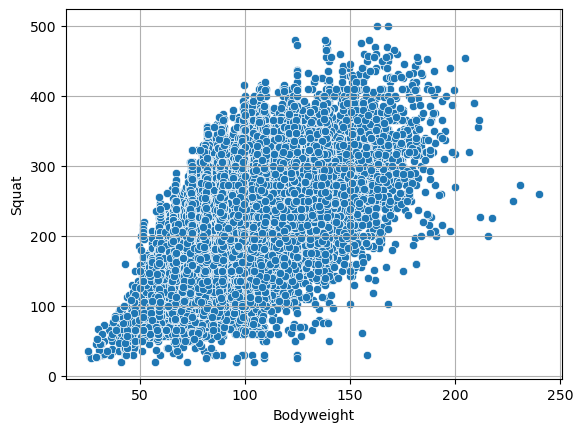

In [19]:
sns.scatterplot(data=df, x='Bodyweight', y='Squat')
plt.grid(True)
plt.show()

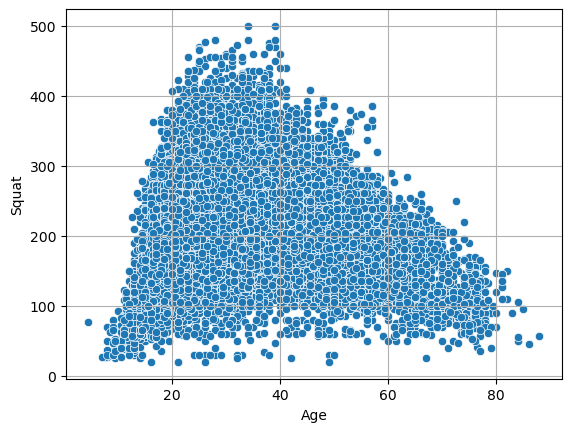

In [20]:
sns.scatterplot(data=df, x='Age', y='Squat')
plt.grid(True)
plt.show()

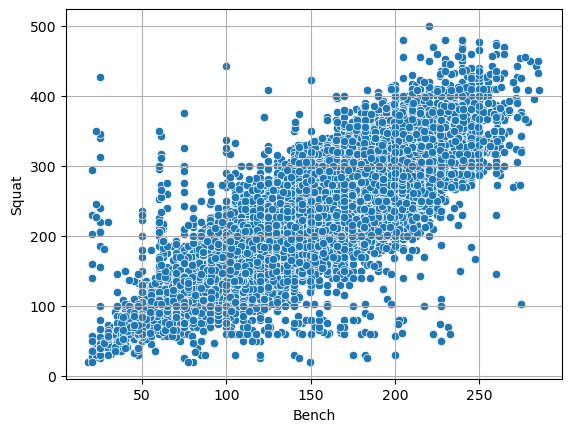

In [21]:
sns.scatterplot(data=df, x='Bench', y='Squat')
plt.grid(True)
plt.show()

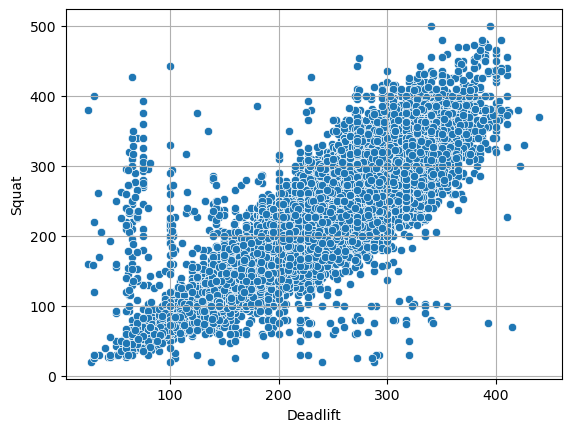

In [22]:
sns.scatterplot(data=df, x='Deadlift', y='Squat')
plt.grid(True)
plt.show()

In [14]:
X = df[['Age', 'Bodyweight', 'Deadlift', 'Bench']].to_numpy().reshape(-1, 4)
y = df['Squat'].to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)
 
lin_regr = LinearRegression(fit_intercept=False)
lin_regr.fit(X_poly_train,y_train)

y_pred = lin_regr.predict(X_poly_test)
tr_error =  mean_squared_error(y_test,y_pred)

y_pred_val = model.predict(X_val)
val_error =  mean_squared_error(y_val,y_pred_val)
print('The training error is: ', tr_error)
print('The validation error is: ', val_error)

The training error is:  653.9485725339339
The validation error is:  719.7550103337219


In [16]:
model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000)
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
tr_error1 =  mean_squared_error(y_test,y_pred1)

y_pred_val1 = model.predict(X_val)
val_error1 =  mean_squared_error(y_val,y_pred_val1)
print('The training error is: ', tr_error1)
print('The validation error is: ', val_error1)

The training error is:  665.0085098374245
The validation error is:  710.5289920021885
